# SuperflexPy example 03: Initialize a single element model

Author: Marco Dal Molin

Collaborators: Fabrizio Fenicia, Dmitri Kavetski

## What's in this example

This example will cover the following aspects:
- [Initialize a single element model](https://superflexpy.readthedocs.io/en/latest/demo.html#single-element-configuration)

By clicking on the items you will be redirected to the documentation page (when available) that explains the arguments in a more detailed way. 

## What's not in this example

The following aspects are already covered in other examples:

- [Run the model](./01_run_simple_model.ipynb)
- [Change states and parameters](./01_run_simple_model.ipynb)

For this reason we will put only the code need, without further explanations. You can check the other examples by clicking on the items above.

## Do you want to use this example as a script?

Examples of SuperflexPy are created and distributed using Jupyter notebooks because they enable to conjugate runnable code with text explanations. We have decided to not provide the content of the notebooks as script because this would mean duplicating the same content in multiple places, bringing to maintainability problems.

If the user wants to download the content of this notebook as a python script, it is possible following the steps:
1. If not already done, open this notebook using [Binder](https://mybinder.org/v2/gh/dalmo1991/superflexPy/master?filepath=examples%2F03_init_single_element_model.ipynb)
2. Go on File -> Download as -> Python (.py)
3. Select the saving path

The result is a Python script that contains all the markdown text as comment and the code contained inside the cells.

## STEP 1: Initialize the single element model

A single element model is composed by just one element. Its initialization requires the definition of:

- parameters (if present)
- states (if present)
- numerical approximator (if present)
- identifier

For this example we will use the `FastReservoir` implemented as part of the `hbv` model.

### 01. Import an initialize the numerical routines

The differential equations of the reservoir require a numerical approximator and a root finder. Before initializing the reservoir, these need to be imported and initialized.

In [1]:
from superflexpy.implementation.computation.pegasus_root_finding import PegasusPython
from superflexpy.implementation.computation.implicit_euler import ImplicitEulerPython

root_finder = PegasusPython()
numeric_approximator = ImplicitEulerPython(root_finder=root_finder)

### 02. Initialize the reservoir

Now the reservoir can be imported and initialized. The names of parameters and states are specified in the documentation of the class.

In [2]:
from superflexpy.implementation.elements.hbv import FastReservoir

fr = FastReservoir(
    parameters={'k': 0.1, 'alpha': 1.0},
    states={'S0': 10.0},
    approximation=numeric_approximator,
    id='FR'
)

## STEP 2: Run the model

Now that the reservoir has been initialized, it can be run. This can be done running the code in the following cell.

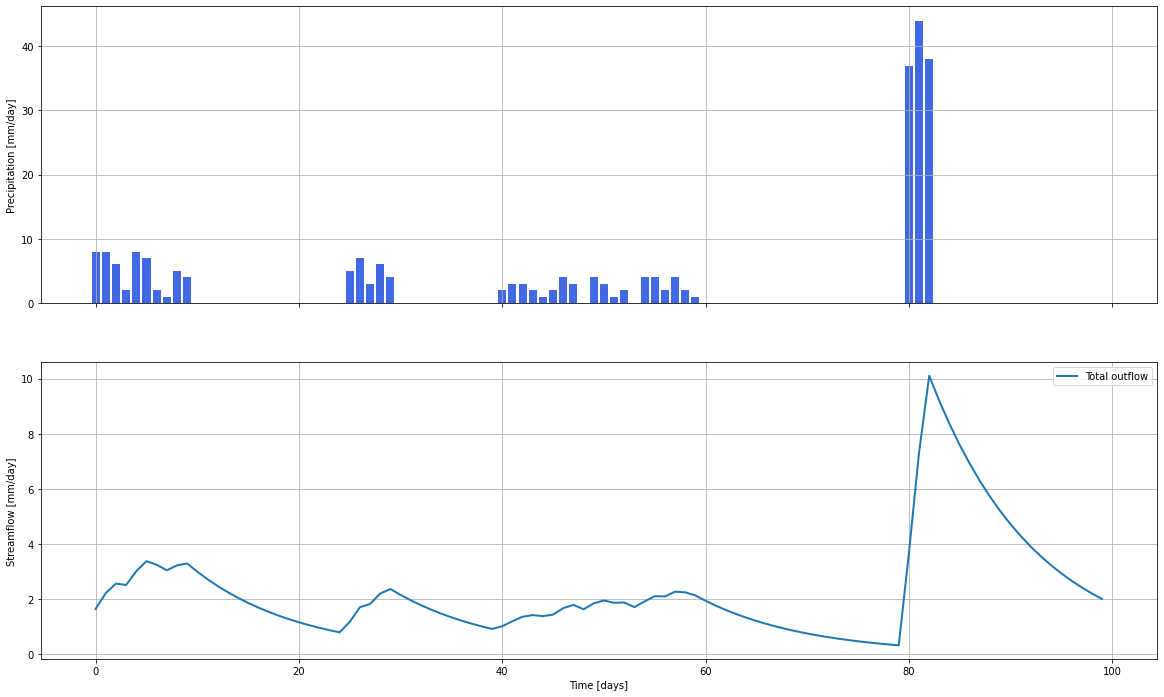

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Fix the seed
SEED = 2
rng = np.random.RandomState(seed=SEED)

# Generate the input
P = np.zeros(100)
P[:10] = rng.randint(10, size=10)
P[25:30] = rng.randint(20, size=5)
P[40:60] = rng.randint(5, size=20)
P[80:83] = rng.randint(30, 50, size=3)

# Assign the input
fr.set_input([P])

# Set the timestep
fr.set_timestep(1.0)

# Run the model
output = fr.get_output()

# Plot
fig, ax = plt.subplots(2, 1, figsize=(20, 12), sharex=True)
ax[0].bar(x=np.arange(len(P)), height=P, color='royalblue')
ax[0].set_ylabel('Precipitation [mm/day]')
ax[0].grid(True)
ax[1].plot(np.arange(len(P)), output[0], lw=2, label='Total outflow')
ax[1].set_xlabel('Time [days]')
ax[1].set_ylabel('Streamflow [mm/day]')
ax[1].legend()
ax[1].grid(True)
pass